In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('bmh')
%matplotlib inline

In [2]:
boston = pd.read_csv('bostonhousing.csv')
boston.head()

ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

# finding out skew for each predictor

In [3]:
from scipy.stats import skew
skew(boston)

array([ 0.        ,  5.20765239,  2.21906306,  0.29414628,  3.39579929,
        0.72714416,  0.40241467, -0.59718559,  1.00877876,  1.00183349,
        0.66796827, -0.79994453, -2.88179835,  0.90377074,  1.10481082])

In [4]:
boston.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [5]:
for name, skew in zip(boston.columns, skew(boston)):
    print(name, skew)

ID 0.0
crim 5.20765238786
zn 2.21906305715
indus 0.294146276844
chas 3.39579929264
nox 0.727144159774
rm 0.402414668025
age -0.597185594802
dis 1.00877875652
rad 1.00183349245
tax 0.667968268724
ptratio -0.799944532037
black -2.88179834526
lstat 0.903770743135
medv 1.10481082286


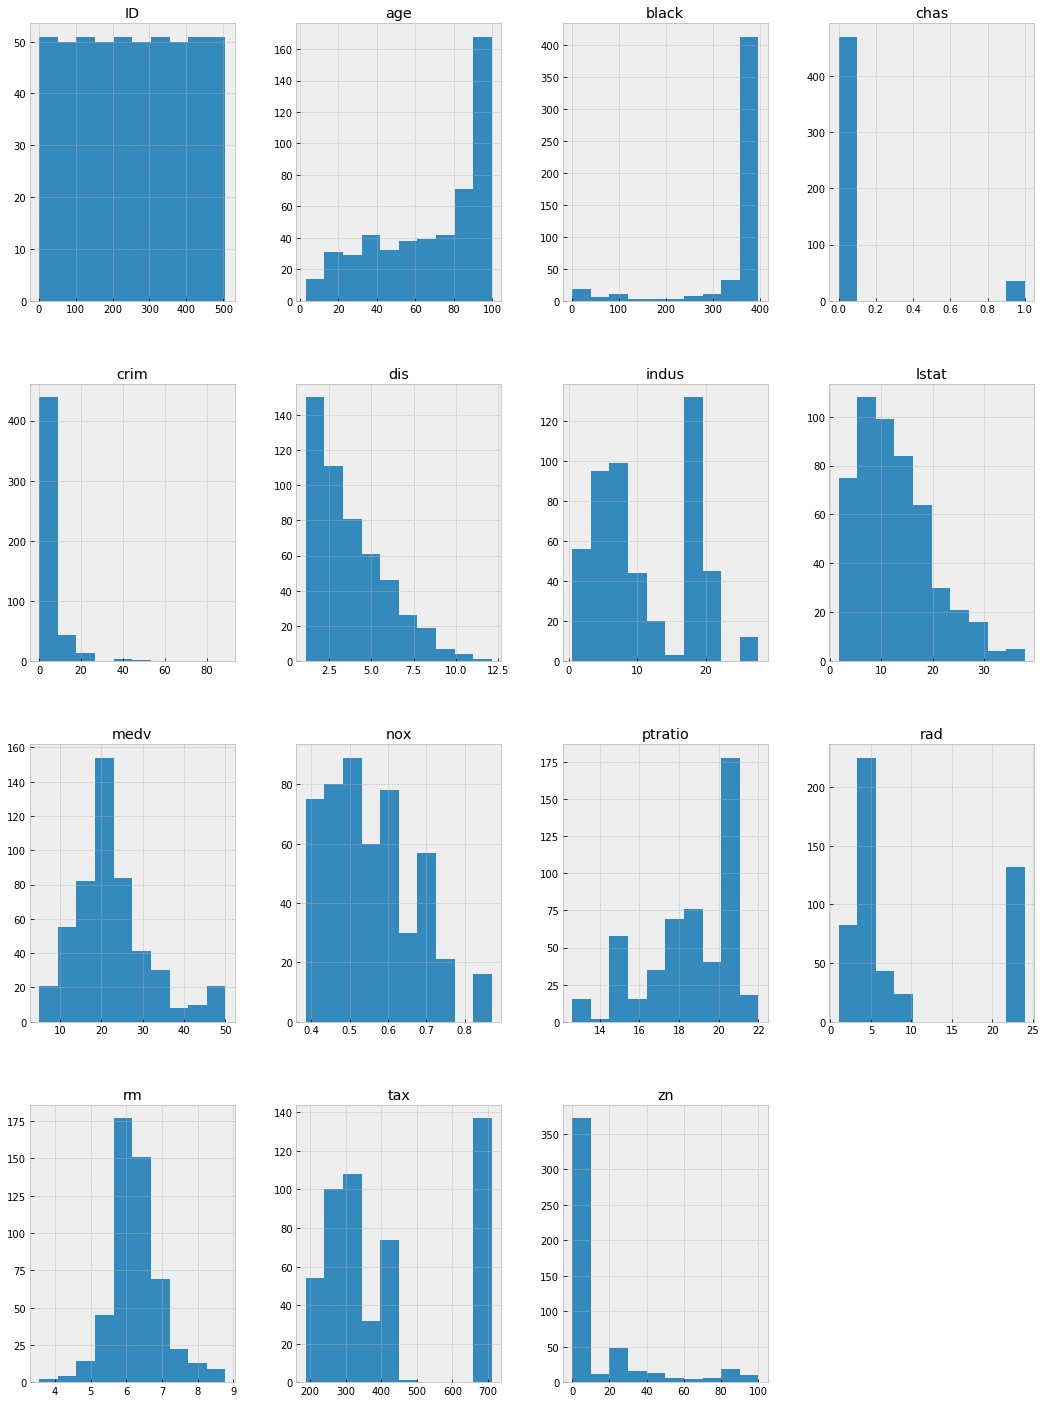

In [6]:
boston.hist(figsize=(18, 25))
plt.show()

# Reducing Skewness

In [7]:
boston['crim'].skew()

5.2231487982438507

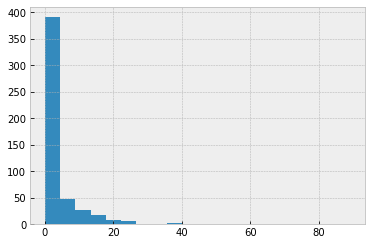

In [8]:
plt.figure()
plt.hist(boston['crim'], bins = 20 )
plt.show()

##### The predictor 'crim' is right and positively skewed with a skew value of 5.2231487982438507

### Right skew can be reduced by appling 'reciprocals' or 'squareroots' or 'log'

In [9]:
crim1 = 1/boston['crim']                #  RECIPROCALS
crim1.skew()

3.7445842730171499

In [10]:
crim2 = np.sqrt(boston['crim'])         # SQUARE ROOT
crim2.skew()

2.0243821031236759

In [11]:
crim3 = np.log(boston['crim'])          # LOG
crim3.skew()

0.40593449884960481

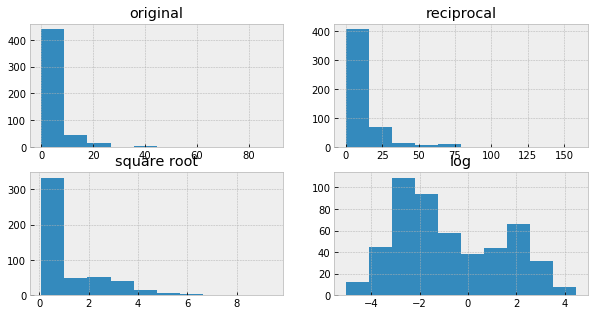

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.hist(boston['crim'])
plt.title('original')
plt.subplot(2,2,2)
plt.hist(crim1)
plt.title('reciprocal')
plt.subplot(2,2,3)
plt.hist(crim2)
plt.title('square root')
plt.subplot(2,2,4)
plt.hist(crim3)
plt.title('log')
plt.show()

##### There is more reduction in skew when 'log' is applied compared to others

In [13]:
boston['ptratio'].skew()

-0.80232492685378087

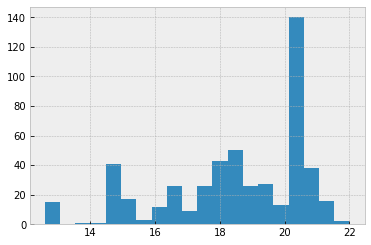

In [14]:
plt.figure()
plt.hist(boston['ptratio'], bins = 20 )
plt.show()

##### The predictor 'ptratio' is left and negatively skewed with a skew value of -0.80232492685378087

In [15]:
pt1 = boston['ptratio'] ** 2
pt1.skew()

-0.61031940176071842

In [16]:
pt2 = boston['ptratio'] ** 3
pt2.skew()

-0.43598264990648039

In [17]:
pt3 = boston['ptratio'] ** 6
pt3.skew()

0.011634849809335707

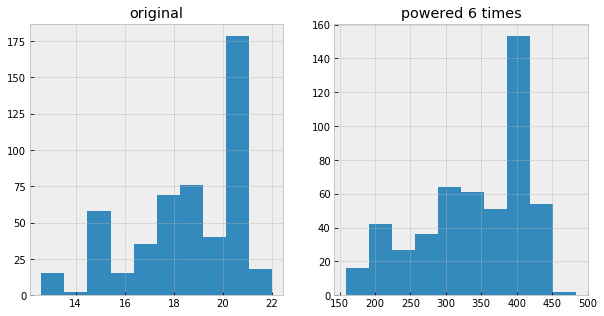

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(boston['ptratio'])
plt.title('original')
plt.subplot(1,2,2)
plt.hist(pt1)
plt.title('powered 6 times')
plt.show()

##### Left skew can be reduced by applying squares, cubes or higher powers

In [42]:
from scipy import stats

# Probplots

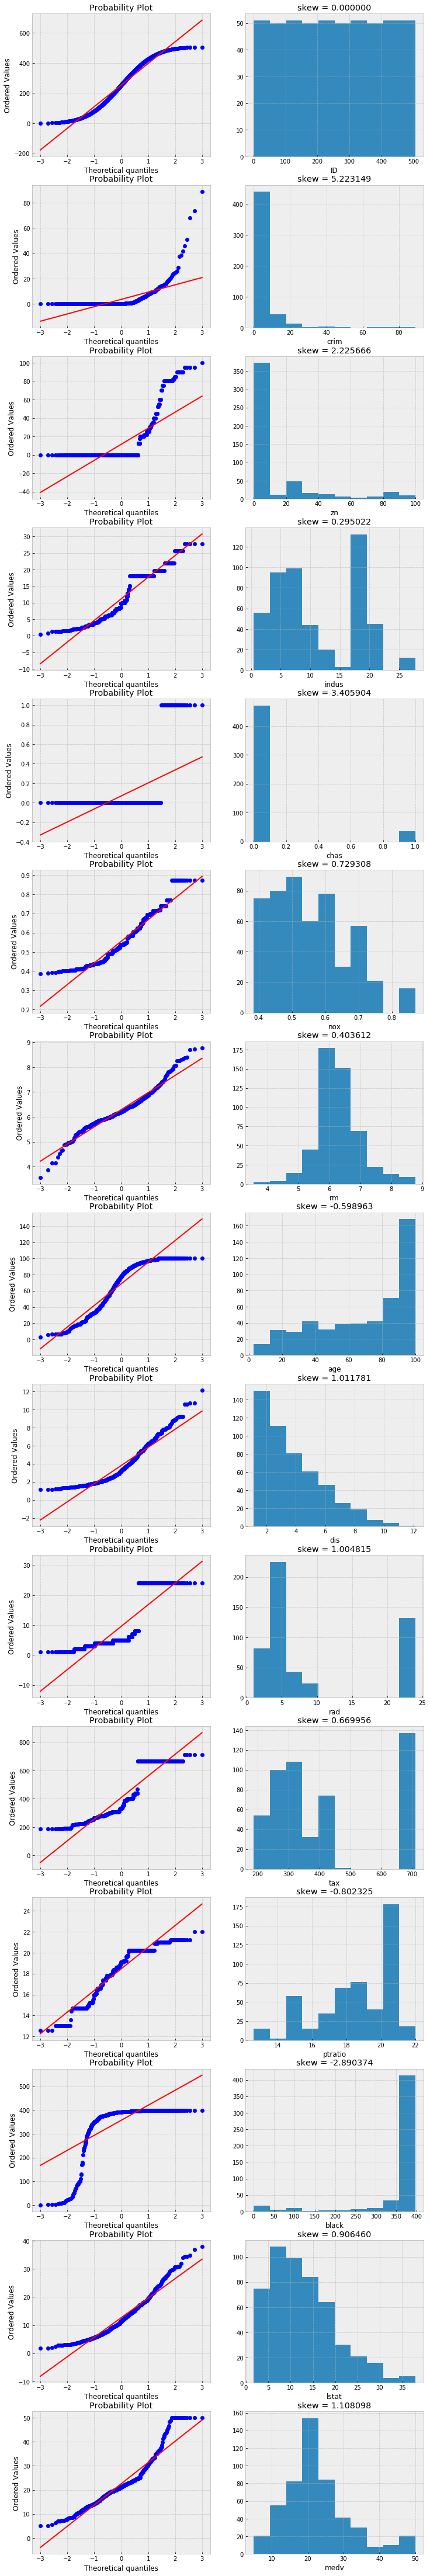

In [41]:
plt.figure(figsize=(12,80))
for i,j in zip(list(range(1,31, 2)),list(boston)):
    plt.subplot(15, 2, i)
    x= stats.probplot(boston[j], plot=plt)
    plt.subplot(15, 2, i+1)
    boston[j].hist()
    plt.title('skew = %f'%boston[j].skew())
    plt.xlabel(j)